# Ford GoBike System Dataset
## by Reem Helal

## Investigation Overview

> This presentation will include the main EDA outcomes from GoBike dataset in 2017. 

## Ford GoBike System Dataset Overview

> Ford GoBike data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

The data set features are :
<ul>
    <li>Trip Duration (seconds).</li>
    <li>Start Time and Date.</li>
    <li>End Time and Date.</li>
    <li>Start Station ID.</li>
    <li>Start Station Name.</li>
    <li>Start Station Latitude.</li>
    <li>Start Station Longitude.</li>
    <li>End Station ID.</li>
    <li>End Station Name.</li>
    <li>End Station Latitude.</li>
    <li>End Station Longitude.</li>
    <li>Bike ID.</li>
    <li>User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual).</li>
</ul>

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
bike_df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [271]:
# descriptive statistics for numeric variables after cleaning.
bike_df.describe()

,duration_sec,start_station_id,end_station_id,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,92.184041,1672.533079
std,3444.146451,86.083078,84.969491,971.356959
min,61.000000,3.000000,3.000000,10.000000
25%,382.000000,24.000000,23.000000,787.000000
50%,596.000000,67.000000,66.000000,1728.500000
75%,938.000000,139.000000,134.000000,2520.000000
max,86369.000000,340.000000,340.000000,3733.000000


In [273]:
#Create a seasons columns for start and end time.

winter = [12,1,2]
spring = [3,4,5]
summer = [6,7,8]
autumn = [9,10,11]

seasons = pd.DataFrame().assign(winter = winter, spring = spring, summer = summer, autumn = autumn).melt().set_index('value')

bike_df['Start_Seasons'] = bike_df['start_time'].dt.month.astype(int).map(seasons.variable)

bike_df['End_Seasons'] = bike_df['end_time'].dt.month.astype(int).map(seasons.variable)

bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,start_time_month,end_time_month,start_time_day,end_time_day,start_time_hour,end_time_hour,Start_Seasons,End_Seasons
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,43,San Francisco Public Library (Grove St at Hyde...,96,Customer,December,January,Sunday,Monday,16,15,winter,winter
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,96,Dolores St at 15th St,88,Customer,December,January,Sunday,Monday,15,13,winter,winter
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,245,Downtown Berkeley BART,1094,Customer,December,January,Sunday,Monday,22,11,winter,winter
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,5,Powell St BART Station (Market St at 5th St),2831,Customer,December,January,Sunday,Monday,17,10,winter,winter
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,247,Fulton St at Bancroft Way,3167,Subscriber,December,January,Sunday,Monday,14,2,winter,winter


> The most popular start station is $San Francisco Ferry Building (Harry Bridges Plaza)$ with $15,187$ trips in 2017.

> The least popular start station is $Ellsworth St at Russell St$ with only $1$ trip in 2017.

> Top 10 Start Stations are :
> 1. San Francisco Ferry Building (Harry Bridges Plaza)           
> 2. The Embarcadero at Sansome St                                
> 3. San Francisco Caltrain (Townsend St at 4th St)               
> 4. San Francisco Caltrain Station 2  (Townsend St at 4th St)    
> 5. Market St at 10th St                                         
> 6. Montgomery St BART Station (Market St at 2nd St)             
> 7. Berry St at 4th St                                           
> 8. Powell St BART Station (Market St at 4th St)                 
> 9. Howard St at Beale St                                        
> 10. Steuart St at Market St                                     

> The most popular start station is $San Francisco Caltrain (Townsend St at 4th St)$ with $17,378$ trips in 2017.

> The least popular start station is $Empire St at 1st St$ with only $2$ trips in 2017.

> Top 10 End Stations are :
> 1. San Francisco Caltrain (Townsend St at 4th St)               
> 2. San Francisco Ferry Building (Harry Bridges Plaza)           
> 3. The Embarcadero at Sansome St                                
> 4. San Francisco Caltrain Station 2  (Townsend St at 4th St)    
> 5. Montgomery St BART Station (Market St at 2nd St)             
> 6. Market St at 10th St                                         
> 7. Powell St BART Station (Market St at 4th St)                 
> 8. Berry St at 4th St                                           
> 9. Steuart St at Market St                                      
> 10. Powell St BART Station (Market St at 5th St)

### Proportions of Seasons when the trip starts Visualization 

Let's start our exploration by looking at the first main variable of interest: Seasons.


Text(0, 0.5, 'Proportion')

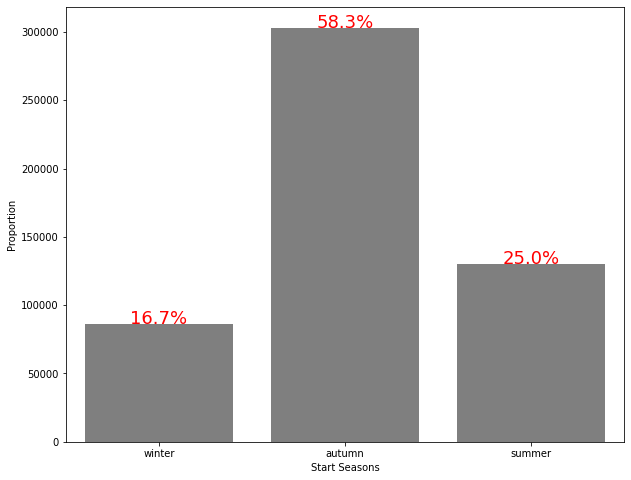

In [290]:
# create the plot for the proportion of each season across 2017 in Start_Season.
fig, ax = plt.subplots(figsize=(10,8))

bs_color = sb.color_palette()[7]
sb.countplot(data = bike_df, x = 'Start_Seasons', color = bs_color, ax = ax)

# add annotations
n_points = bike_df.shape[0]
seasons_no = bike_df['Start_Seasons'].value_counts()
locs, labels = plt.xticks() 

for loc, label in zip(locs, labels):
    count = seasons_no[label.get_text()]
    pct_string = '{:0.1f}%'.format(100 * count/n_points)
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'r', fontsize = 18)

plt.xlabel('Start Seasons')
plt.ylabel('Proportion')

> Amazing! $Autumn$ is the season for bike trips with $58.3$% where $Summer$ season takes the second place with $25$% and $Winter$ season with $16.7$%. We can notice that S$pring$ season has no place in biking trips with $0$%, which is really mysterious!

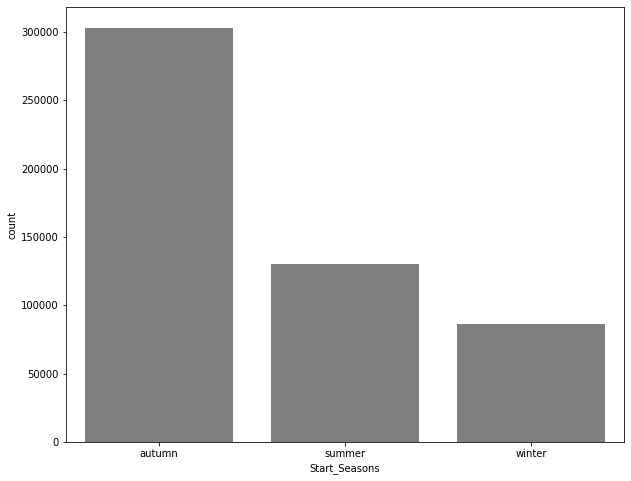

In [291]:
fig, ax = plt.subplots(figsize=(10,8))
bs_color = sb.color_palette()[7]
strt_seasons_ordr = bike_df['Start_Seasons'].value_counts().index
sb.countplot(data = bike_df, x = 'Start_Seasons', color = bs_color, order = strt_seasons_ordr, ax = ax );

Text(0, 0.5, 'Proportion')

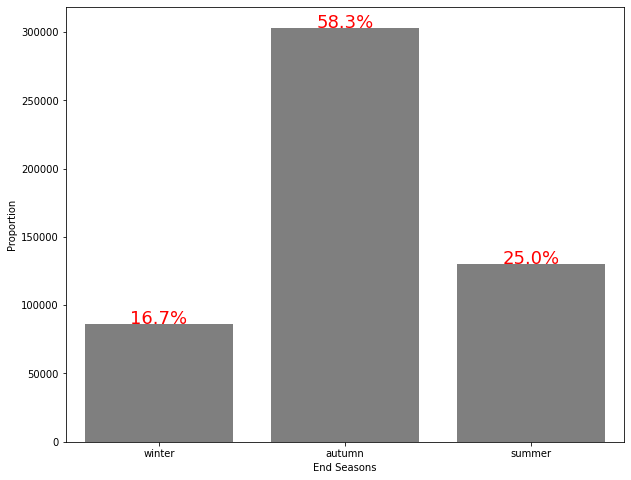

In [292]:
# create the plot for the proportion of each season across 2017 in End_Season.
fig, ax = plt.subplots(figsize=(10,8))

bs_color = sb.color_palette()[7]
sb.countplot(data = bike_df, x = 'End_Seasons', color = bs_color, ax = ax )

n_points = bike_df.shape[0]
seasons_no = bike_df['End_Seasons'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = seasons_no[label.get_text()]
    pct_string = '{:0.1f}%'.format(100 * count/n_points)
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'r', fontsize = 18)

plt.xlabel('End Seasons')
plt.ylabel('Proportion')

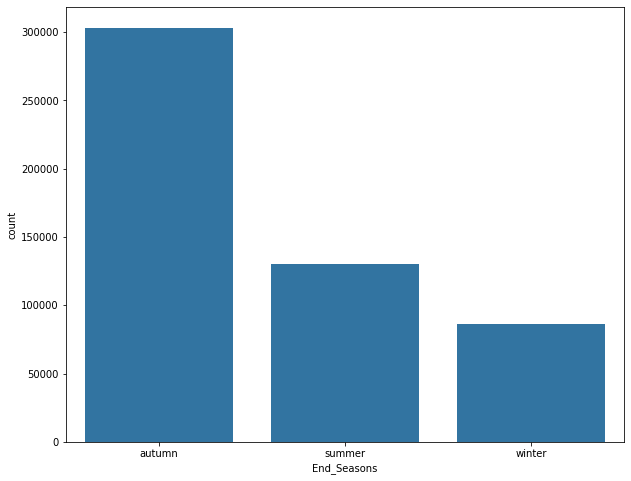

In [293]:
fig, ax = plt.subplots(figsize=(10,8))
bs_color = sb.color_palette()[0]
end_seasons_ordr = bike_df['End_Seasons'].value_counts().index
sb.countplot(data = bike_df, x = 'End_Seasons', color = bs_color, order = end_seasons_ordr, ax = ax);

> The proportions of seasons across the starting and ending trips are exactly the same!. Which we can say that $Autumn$ is the season for biking trips and $Summer$ comes next and $Winter$ is the third and $Spring$ in the last!

### Proportions of Types of Bike Riders Visualization

> Now, lets move to the next main interest variable : user_type.

> Which type of bike riders is the most ? 

Text(0, 0.5, 'Proportion')

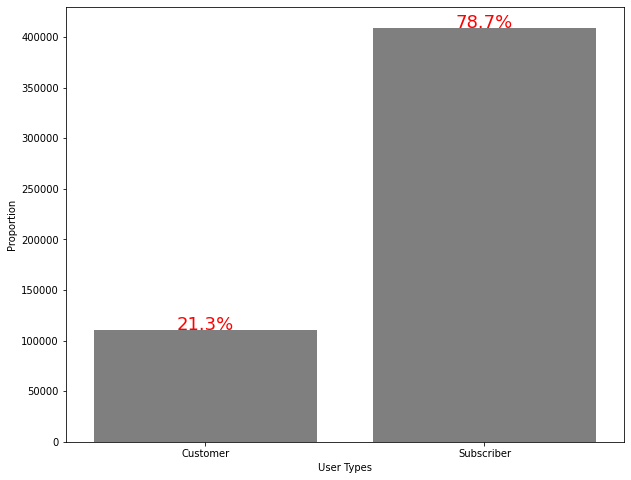

In [294]:
# create the plot for the proportion of each bike riders types across 2017.
fig, ax = plt.subplots(figsize=(10,8))
bs_color = sb.color_palette()[7]
sb.countplot(data = bike_df, x = 'user_type', color = bs_color, ax = ax)

n_points = bike_df.shape[0]
users_no = bike_df['user_type'].value_counts()
locs, labels = plt.xticks() 

for loc, label in zip(locs, labels):

    count = users_no[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'r', fontsize = 18)

plt.xlabel('User Types')
plt.ylabel('Proportion')

> Awesome! $Subscribers$ are the most bike riders with proportion of $78.7$% where $Customer$ bike riders has a proportion of $21.3$% across 2017.

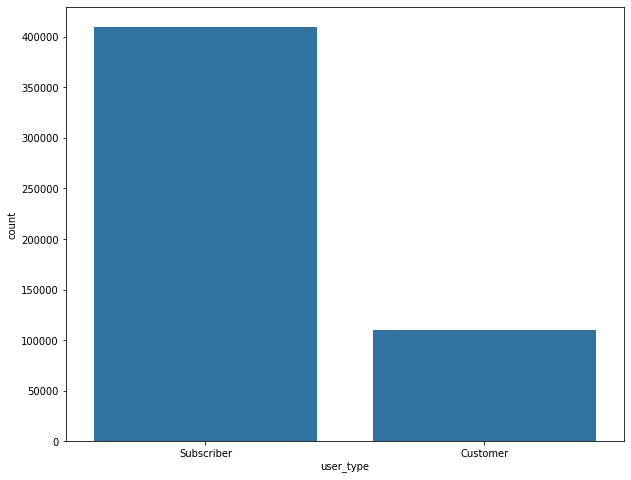

In [295]:
#Plot the bar chart of ordered user_type.
fig, ax = plt.subplots(figsize=(10,8))
base_color = sb.color_palette()[0]
users_ordr = bike_df['user_type'].value_counts().index
sb.countplot(data = bike_df, x = 'user_type', color = base_color, order = users_ordr, ax = ax);

### Distribution of Duration of the Bike Trip across Seasons Visualization

> Lets take a look on the trip duration over seasons.

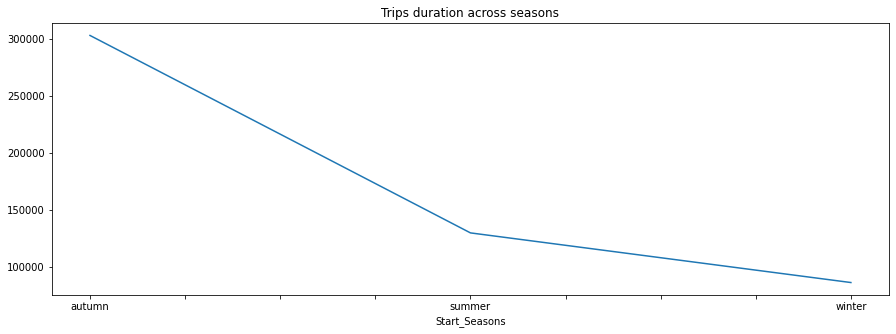

In [298]:
#Visualize the duration_sec vs seasons.
duration_df.count().plot(title = 'Trips duration across seasons', kind = 'line', figsize = (15,5));

> We can tell that the peak of bikes trips duration is in Autumn, and it decreased in a noticable way in Summer and keep decreasing but in better way in Winter.

---

### Distribution of Bike ID across users Visualization

> Lets take a look on the trip duration over seasons.

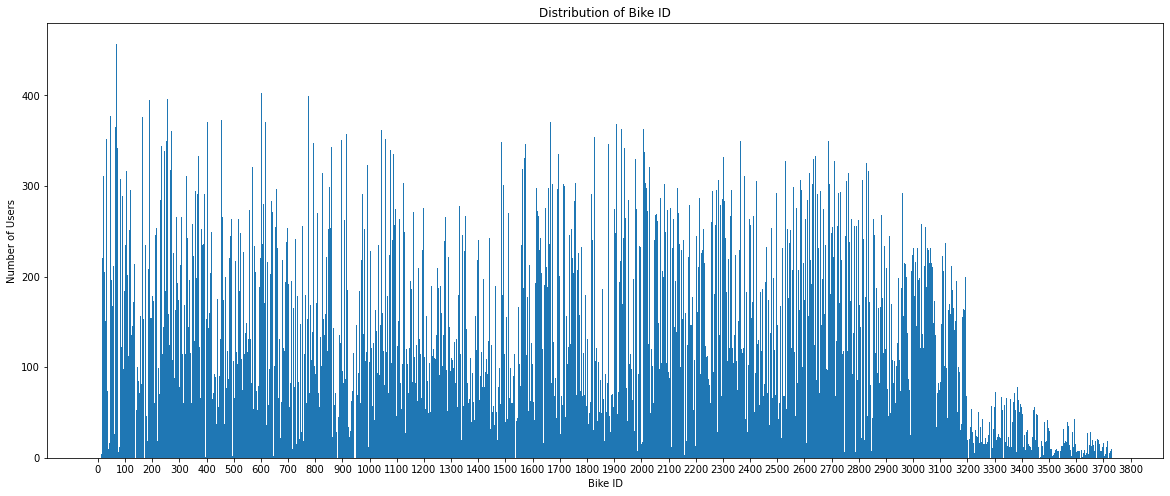

In [299]:
#Plotting bike_id distribution.
binsize = 1
bins = np.arange(0, bike_df['bike_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 3900, 100))
plt.hist(data = bike_df, x = 'bike_id', bins = bins)
plt.title('Distribution of Bike ID')
plt.xlabel('Bike ID')
plt.ylabel('Number of Users')
plt.show()

> From the visualization of bike ID we can say that there is differences between interests in using specific bikes for trips, this may relates to the features of the bike or the taste of users.

---

### Week Days Performance Visualization

> Lets check the days of the week in both of starting time and ending time.



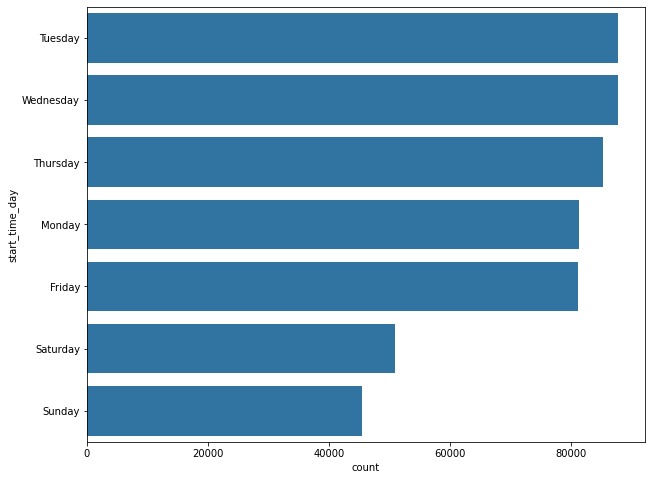

In [300]:
#Plot the days of bike trips in start_time.
fig, ax = plt.subplots(figsize=(10,8))
bs_color = sb.color_palette()[0]
days_ordr = bike_df['start_time_day'].value_counts().index
sb.countplot(data = bike_df, y = 'start_time_day', color = bs_color, order = days_ordr, ax = ax);

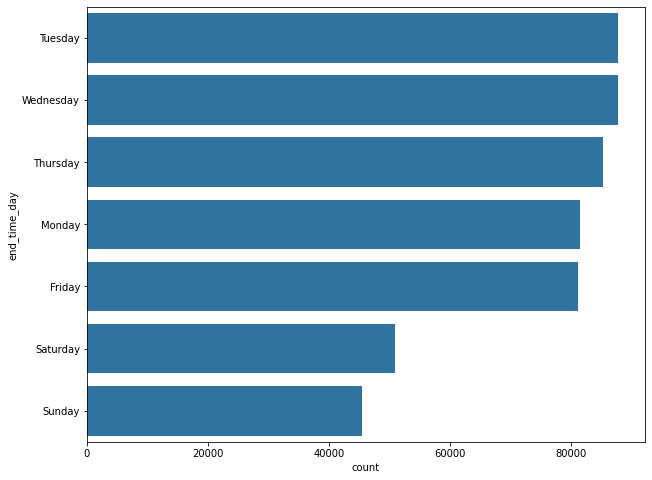

In [301]:
#Plot the days of bike trips in end_time.
fig, ax = plt.subplots(figsize=(10,8))
bs_color = sb.color_palette()[0]
days_ordr = bike_df['end_time_day'].value_counts().index
sb.countplot(data = bike_df, y = 'end_time_day', color = bs_color, order = days_ordr, ax = ax);

> $Tuesday$ and $Wednesday$ have the most of bike trips, follwed by $Thursday$ which is slightly less than them followed by $Monday$ and $Friday$ which are a little bit less than the pervious days, and $Saturday$ comes next where $Sunday$ is at the last.
> We can say that bike trips are the most in the working days.

---

### Hours of the Day Performance Visualization

> Lets check the hours of the week in both of starting time and ending time.

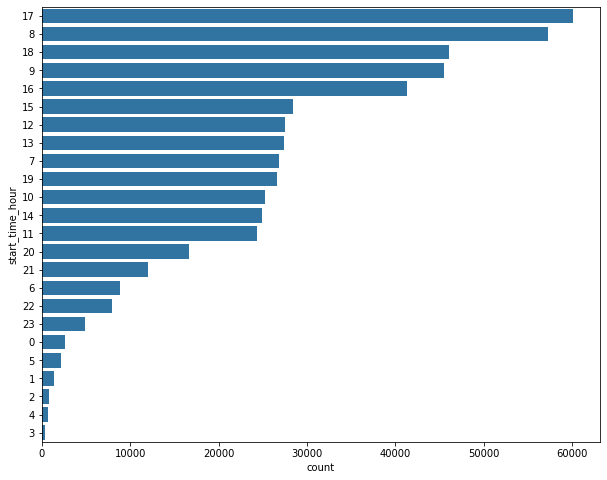

In [302]:
#Plot the hours of bike trips in start_time.
fig, ax = plt.subplots(figsize=(10,8))
bs_color = sb.color_palette()[0]
days_ordr = bike_df['start_time_hour'].value_counts().index
sb.countplot(data = bike_df, y = 'start_time_hour', color = bs_color, order = days_ordr, ax = ax);

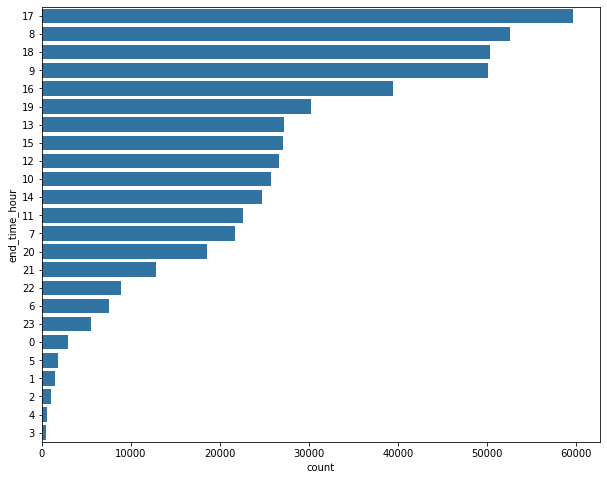

In [303]:
#Plot the hours of bike trips in end_time.
fig, ax = plt.subplots(figsize=(10,8))
bs_color = sb.color_palette()[0]
days_ordr = bike_df['end_time_hour'].value_counts().index
sb.countplot(data = bike_df, y = 'end_time_hour', color = bs_color, order = days_ordr, ax = ax);

> Both of start time and end time hours are so similar to each other, in both of them $5 PM$, $8 AM$, $6 PM$, $9 PM$ and  $4 PM$ are the top bike trips in the day respectively, also they share the same least hours which are $5 AM$, $1 AM$, $2 AM$, $4 AM$and $3 AM$ in order. While they are differ from each other in the other hours of the day.

> We can say that the hours of going to work ad returning back from work is the most active bike trips hours.

---


### Months of 2017 Performance Visualization

> Lets check the months of 2017 in both of starting time and ending time.


Text(0, 0.5, 'Proportion')

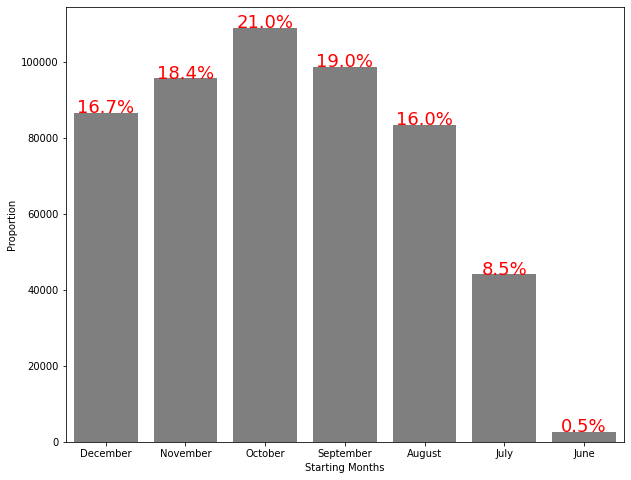

In [304]:
# create the plot for the proportion of each start_time_month across 2017.
fig, ax = plt.subplots(figsize=(10,8))
bs_color = sb.color_palette()[7]
sb.countplot(data = bike_df, x = 'start_time_month', color = bs_color, ax = ax)

n_points = bike_df.shape[0]
users_no = bike_df['start_time_month'].value_counts()
locs, labels = plt.xticks() 

for loc, label in zip(locs, labels):

    count = users_no[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'r', fontsize = 18)

plt.xlabel('Starting Months')
plt.ylabel('Proportion')

Text(0, 0.5, 'Proportion')

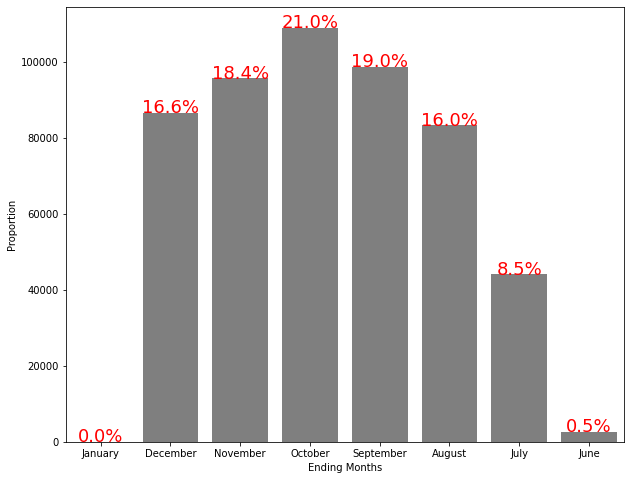

In [305]:
# create the plot for the proportion of each end_time_month across 2017.
fig, ax = plt.subplots(figsize=(10,8))
bs_color = sb.color_palette()[7]
sb.countplot(data = bike_df, x = 'end_time_month', color = bs_color, ax = ax)

n_points = bike_df.shape[0]
users_no = bike_df['end_time_month'].value_counts()
locs, labels = plt.xticks() 

for loc, label in zip(locs, labels):

    count = users_no[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'r', fontsize = 18)

plt.xlabel('Ending Months')
plt.ylabel('Proportion')

> The proportion of months are almost the same in both starting time and ending time, $October$ with $21$%,$September$ with $19$%, $November$ with $18.4$%, $December$ with $16.7$ in starting time and with $16.6$% in ending time, $August$ with $16$%, $July$ with $8.5$%, $June$ with $0.5$% and finally $January$ with $0$%.

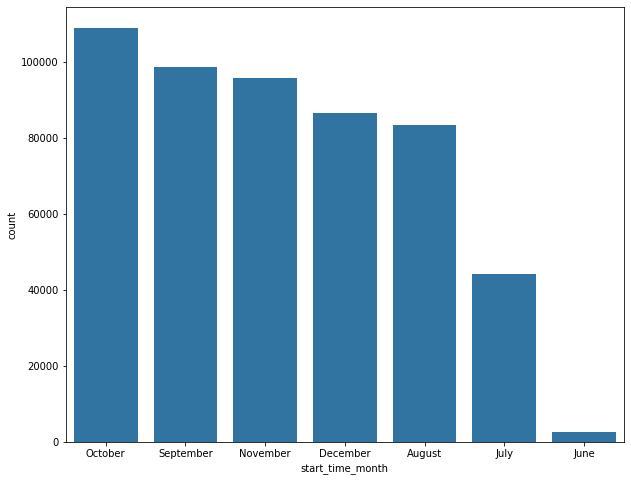

In [306]:
#Plot the months of bike trips in start_time.
fig, ax = plt.subplots(figsize=(10,8))
bs_color = sb.color_palette()[0]
months_ordr = bike_df['start_time_month'].value_counts().index
sb.countplot(data = bike_df, x = 'start_time_month', color = bs_color, order = months_ordr, ax = ax);

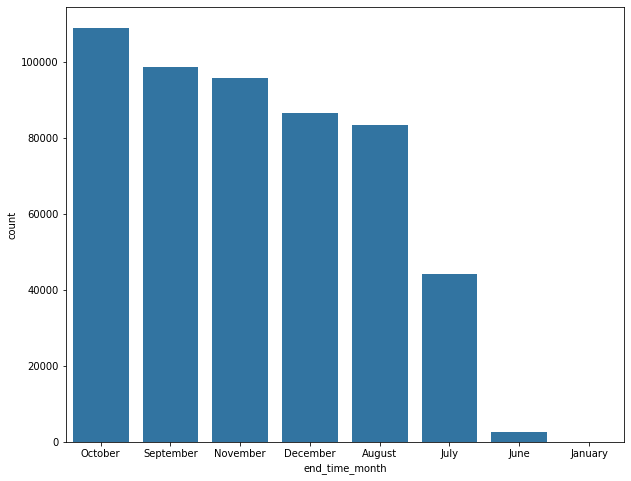

In [307]:
#Plot the months of bike trips in end_time.
fig, ax = plt.subplots(figsize=(10,8))
bs_color = sb.color_palette()[0]
months_ordr = bike_df['end_time_month'].value_counts().index
sb.countplot(data = bike_df, x = 'end_time_month', color = bs_color, order = months_ordr, ax = ax);

### Top 10 Starting Station Visualization

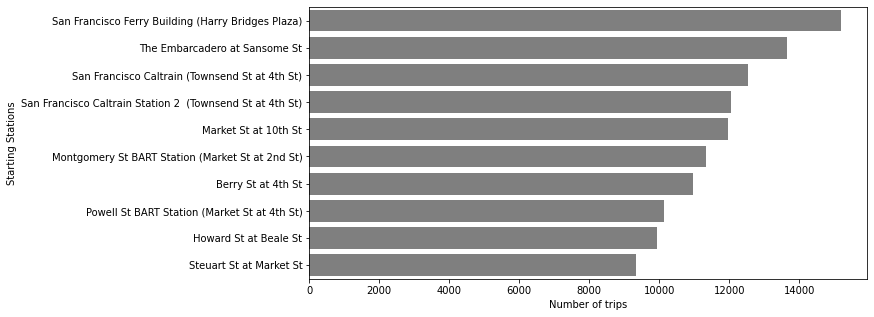

In [308]:
#Plot the top 10 starting stations
fig, ax = plt.subplots(figsize=(10,5))
bs_color = sb.color_palette()[7]
station_ordr = bike_df['start_station_name'].value_counts().index[0:10]
sb.countplot(data = bike_df, y = 'start_station_name', color = bs_color, order = station_ordr, ax = ax);
plt.ylabel('Starting Stations');
plt.xlabel('Number of trips');


### Top 10 Ending Station Visualization

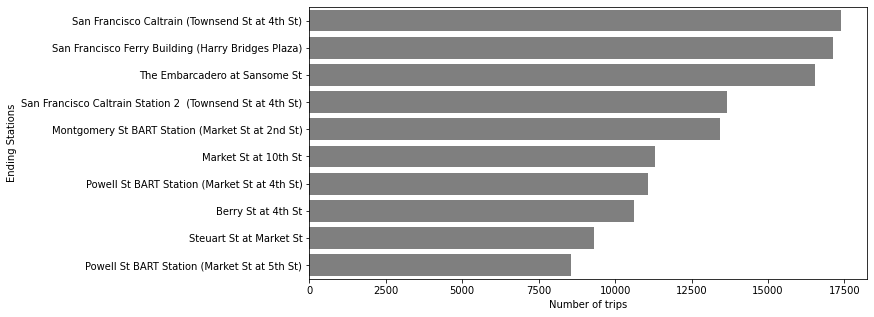

In [309]:
#Plot the top 10 ending stations
fig, ax = plt.subplots(figsize=(10,5))
bs_color = sb.color_palette()[7]
station_ordr = bike_df['end_station_name'].value_counts().index[0:10]
sb.countplot(data = bike_df, y = 'end_station_name', color = bs_color, order = station_ordr, ax = ax);
plt.ylabel('Ending Stations');
plt.xlabel('Number of trips');

### User Types Performance across Seasons

Now, lets have a look on the correlation between seasons and the type of the users.

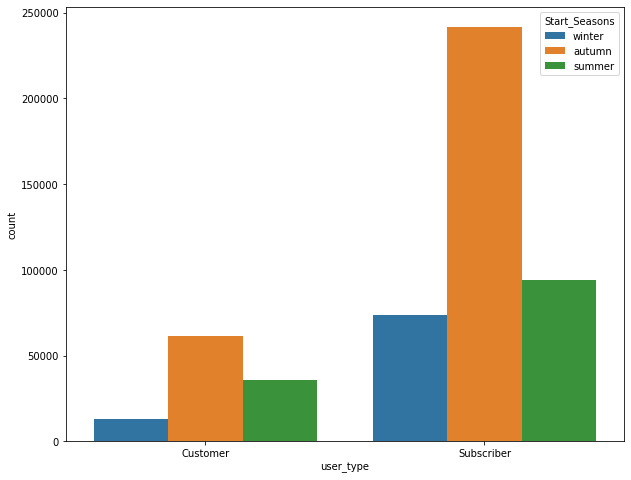

In [310]:
fig, ax = plt.subplots(figsize=(10,8))
sb.countplot(data = bike_df, x = 'user_type', hue = 'Start_Seasons', ax = ax);

> It is obvious from the plot that Winter is the season for both types of users.
---

### Bike Trip Duration VS Months in 2017 Visualization

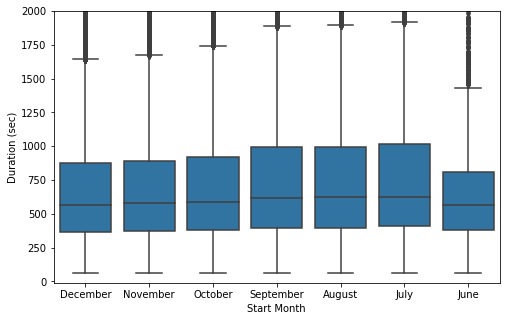

In [311]:
plt.figure(figsize = [8, 5])
bs_color = sb.color_palette()[1]
sb.boxplot(data = bike_df, x = 'start_time_month', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2000])
plt.xlabel('Start Month')
plt.ylabel('Duration (sec)')
plt.show()

> The longest bike trips are in $July$, $September$ and $August$ respectively. Also the shortest bike trips are in $June$.

### Hours Performance Per Days Visualization
> Lets take a look on bike trips active hours in the week days.

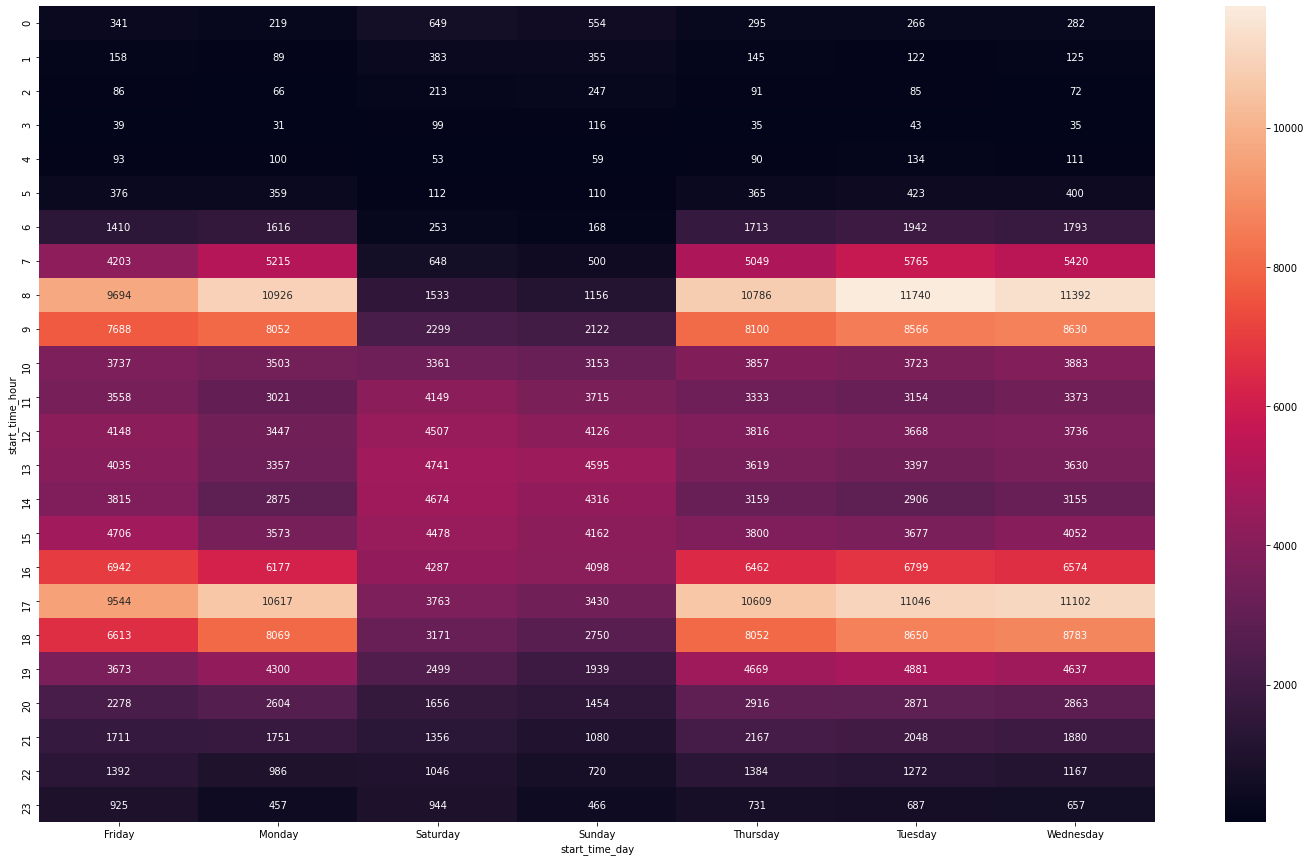

In [314]:
day_counts = bike_df.groupby(['start_time_day', 'start_time_hour']).size()
day_counts = day_counts.reset_index(name = 'count')
day_counts = day_counts.pivot(index = 'start_time_hour', columns = 'start_time_day', values = 'count')
fig, ax = plt.subplots(figsize=(25,15))
sb.heatmap(day_counts, annot = True, fmt = 'd', ax = ax);

> According to the visualization shown above we can say that the starting and ending working hours $8 AM$ and $5 PM$ in working days have the most bike riders.

### Top 10 Starting Station VS Subscriers Visualization

> Lets take a look at the correlation between the subscriber bike riders and top 10 starting stations.

In [315]:
#create a dataframe for each user_type.
subsriber_df = bike_df.query('user_type == "Subscriber"').start_station_name.value_counts()
customer_df = bike_df.query('user_type == "Customer"').start_station_name.value_counts()

station_count = bike_df.start_station_name.value_counts()
y = station_count.values[0:10] 
x = station_count.index[0:10]

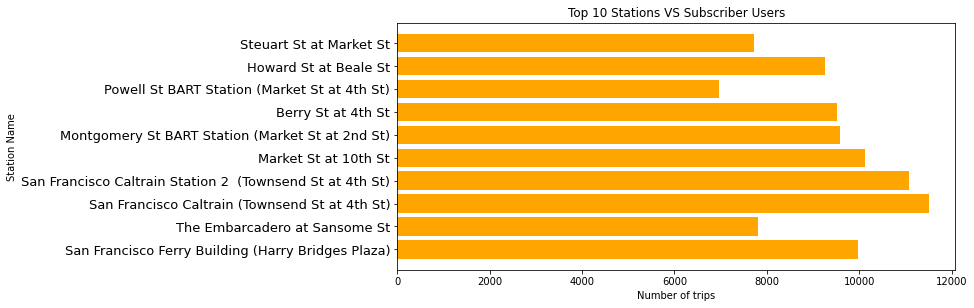

In [316]:
x_subsriber = subsriber_df.index[0:10] 
y_subsriber = subsriber_df.values[0:10] 

x_customer = customer_df.index[0:10] 
y_customer = customer_df.values[0:10] 

#Plot the top 10 starting stations VS Subscribers.
plt.figure(figsize = [10, 10])

plt.subplot(2,1,1)
plt.barh(x, subsriber_df[x],color ='orange')
plt.yticks(fontsize = 13)
plt.title('Top 10 Stations VS Subscriber Users')
plt.xlabel('Number of trips')
plt.ylabel('Station Name');

> $San$ $Francisco$ $Caltrain$ $(Townsend$ $St$ $at$ $4th$ $St)$ station is the most station registration in 2017 where $Powell$ $St$ $BART$ $Station$ $(Market$ $St$ $at$ $4th$ $St)$ comes in the 10th place in the same year.

### Top 10 Starting Station VS Customers Visualization

> Lets take a look at the correlation between the customer bike riders and top 10 starting stations.

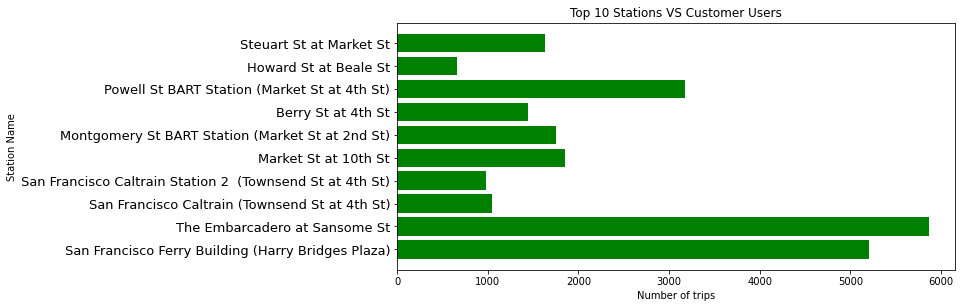

In [317]:
#Plot the top 10 starting stations VS Customers.
plt.figure(figsize = [10, 10])

plt.subplot(2,1,1)
plt.barh(x, customer_df[x], color = 'green')
plt.yticks(fontsize = 13)
plt.title('Top 10 Stations VS Customer Users')
plt.xlabel('Number of trips')
plt.ylabel('Station Name');

> $The$ $Embarcadero$ $at$ $at$ $Sansome$ $St$ station is the most guests station in 2017 where $Howard$ $St$ $at$ $Beale$ $St$ comes in the 10th place in the same year.

### The relationship between variables

> Lets see the correlation between numeric variables in the dataset which are : duration_sec, start_station_id, end_station_id, start_time_hour, end_time_hour and bike_id.

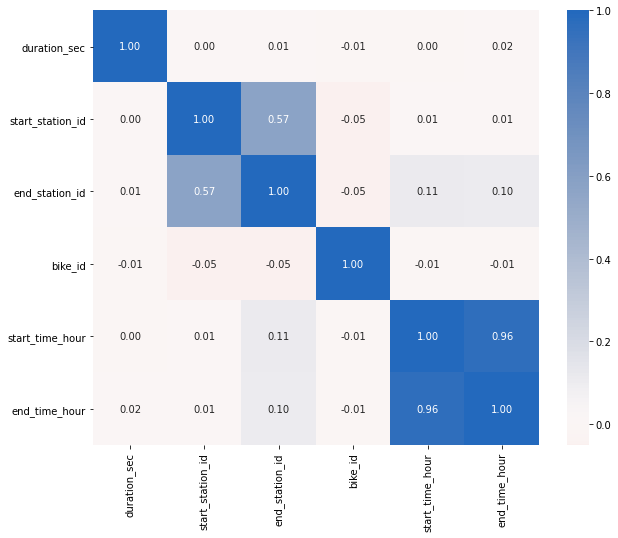

In [318]:
fig, ax = plt.subplots(figsize=(10,8))
sb.heatmap(bike_df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0, ax = ax);

> The $relationship$ between the $starting$ and $ending$ $hours$ of the trip is $positively$ $strong$ with a correlation factor $0.96$. Also The $relationship$ between the $starting$ and $ending$ $station$ $ID$ of the trip is considered to be $strong$ with a correlation factor $0.57$. In other hand there is no relation at all between the $duration$ of the trip and the $starting$ $stations$ and $statring$ $hours$ with $ZERO$ correlation factor.
---

### Bike Trip Duration across User types per Seasons.

> The duration and the season of the trip with the user type.

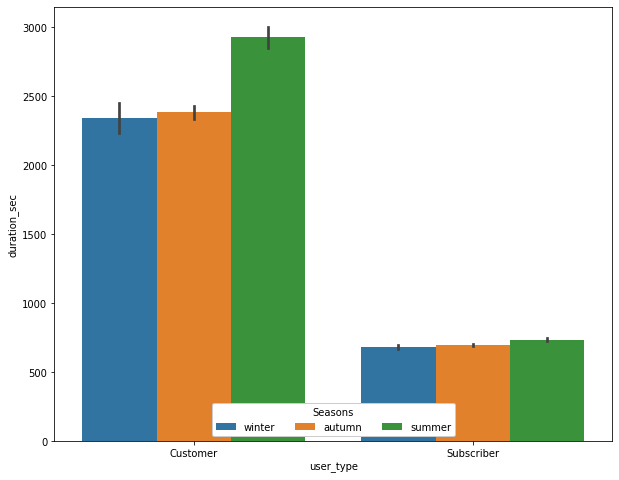

In [319]:
fig, ax = plt.subplots(figsize=(10,8))
axis = sb.barplot(data = bike_df, x = 'user_type', y = 'duration_sec', hue = 'Start_Seasons')
axis.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Seasons');


> $Customer$ users spend much $longer$ duration trips compared with $subscribers$ and they have the best performance in $Summer$ for both users followed by autumn and winter respectively.

---

### Performance of hours per days across seasons.
> The starting days and hours with the season of the year.

In [320]:
#create dataframe for each season.
summer_df = bike_df.query('Start_Seasons == "summer"').groupby(['start_time_day','start_time_hour'], as_index=False).size().reset_index(name='')
winter_df = bike_df.query('Start_Seasons == "winter"').groupby(['start_time_day','start_time_hour'], as_index=False).size().reset_index(name='')
autumn_df = bike_df.query('Start_Seasons == "autumn"').groupby(['start_time_day','start_time_hour'], as_index=False).size().reset_index(name='')

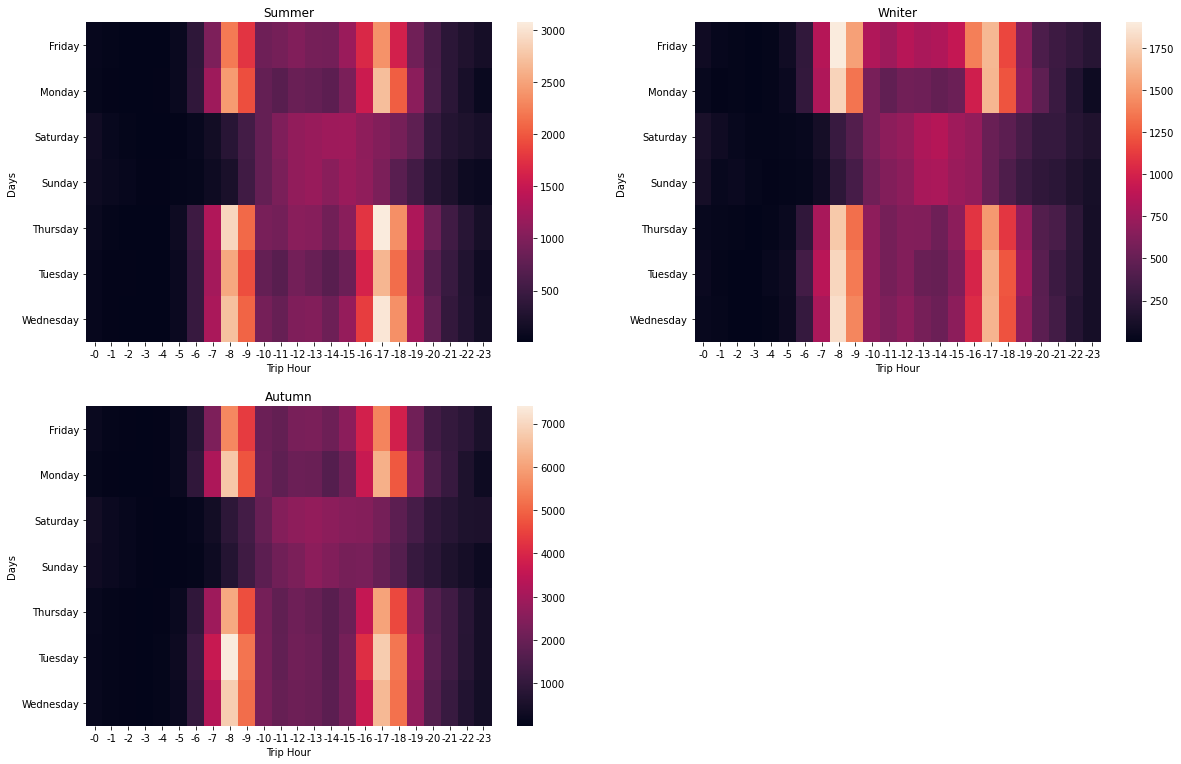

In [321]:
#Plot the heat map fpr each season.
plt.figure(figsize = [20, 20]) 


plt.subplot(3,2,1)
sb.heatmap(summer_df.pivot('start_time_day','start_time_hour'));
plt.title('Summer')
plt.ylabel('Days')
plt.xlabel('Trip Hour');

plt.subplot(3,2,2) 
sb.heatmap(winter_df.pivot('start_time_day','start_time_hour'));
plt.title('Wniter')
plt.ylabel('Days')
plt.xlabel('Trip Hour');

plt.subplot(3,2,3) 
sb.heatmap(autumn_df.pivot('start_time_day','start_time_hour'));
plt.title('Autumn')
plt.ylabel('Days')
plt.xlabel('Trip Hour');

> According to the visualization, for all seasons $8$ $AM$ and $5$ $PM$ are the most active hours in the whole week but it withdraw on $Saturday$ and $Sunday$ as long as they are days off.

### Conclusion

> As a conclusion, we can say that Autumn was the most active bike riding season where Summer comes to the fist place when we put the duration of the trip in our consideration. The thing which is really strange that there is NO bike riders in Spring, and I think that is because there is no data for Spring season in this dataset. Subscriber users are the most bike riders in all season where Customer users comes to the first place when it comes to consider the duration of the trip. Moreover 8 Am and 5 PM are the most biking trips across the working days for all seasons.



In [1]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle

Traceback (most recent call last):
  File "C:\Users\Reemo\anaconda3\lib\site-packages\traitlets\traitlets.py", line 528, in get
    value = obj._trait_values[self.name]
KeyError: 'template_paths'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Reemo\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Reemo\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Reemo\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Reemo\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\Reemo\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 519, in convert_notebooks
    self.exporter = cls(config=self.co